# Exercise 10

The classic Olivetti faces dataset contains 400 grayscale 64 X 64-pixel images of faces. Each image is flattened to a 1D vector of size 4096. Forty different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Loadthe dataset using the `sklearn.datasets.fetch_olivetti_faces()` function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you will probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using _k_-means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster?

## Step 1. Load and split the dataset

In [9]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [10]:
olivetti.data.shape

(400, 4096)

In [12]:
olivetti.DESCR

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    =================   ============

In [6]:
import matplotlib.pyplot as plt

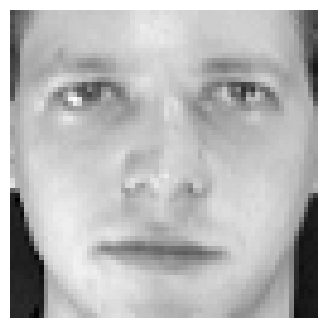

In [11]:
plt.figure(figsize=(4, 4))
plt.imshow(olivetti.images[0], cmap='gray')
plt.axis('off')
plt.show()

In [13]:
import numpy as np

unique_labels = np.unique(olivetti.target)
unique_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [18]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(olivetti.data, olivetti.target, stratify=olivetti.target, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.2, random_state=42)

## Step 2. Find optimal number of clusters

In [30]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from joblib import Parallel, delayed

In [50]:
k_values = np.arange(30, 60, 3) # [30, 33,...,57]
k_scores = []

def compute_silhouette(k, X):
    labels = KMeans(n_clusters=k, n_init=10, random_state=42).fit_predict(X)
    sil_score = silhouette_score(X, labels)
    k_scores.append(sil_score)
    return silhouette_score(X, labels)

k_scores = [compute_silhouette(k, X_train) for k in k_values]  

# k_scores = Parallel(n_jobs=-1)(
#     delayed(compute_silhouette)(k, X_train) for k in k_values
# )

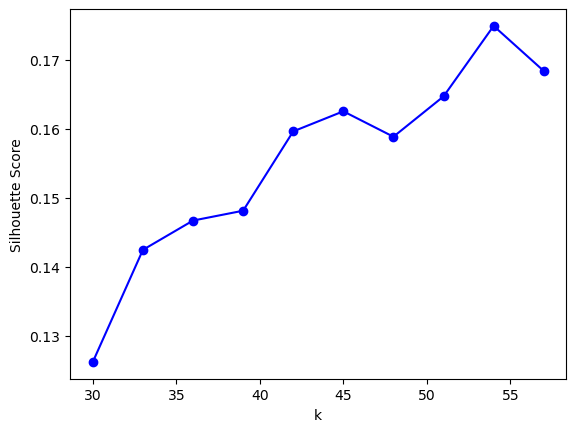

In [52]:
# Plot score to visualize peaks
plt.plot(k_values, k_scores, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

In [53]:
k = k_values[np.argmax(k_scores)]
print(f"Best k for max score is {k}")

Best k for max score is 54


## Step 3. Cluster the images using the optimal number of clusters

In [57]:
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(X_train)  
train_cluster_labels = kmeans.labels_
train_cluster_labels

array([12,  7, 29, 10,  5, 30, 18, 44, 26, 48,  6,  9, 29, 17, 36,  5, 17,
       35,  4, 14, 36, 34, 15,  4, 32, 39, 14,  0,  6, 31, 38,  5, 10, 15,
       29,  9, 43,  9, 15, 52, 11, 12,  8, 16, 46, 53,  5, 45, 39, 39, 24,
        3,  4,  7, 53,  3,  6, 41, 45,  9, 18,  8, 37, 50,  4, 41, 38, 30,
        9,  7, 24, 51,  5,  7, 11, 35, 36, 22,  2, 19, 37, 50, 28, 41, 16,
       13, 41, 49, 20,  6,  6, 40, 26, 31, 41, 14, 44, 45, 20, 34, 11, 10,
       50, 36,  5, 38, 27, 38,  9, 33, 10, 10, 32, 44, 23, 20, 52, 32,  1,
        4, 38,  8,  4, 20, 19, 28, 12, 17,  2, 16, 11,  4, 12, 49, 17, 43,
       37, 42,  2, 29, 10, 37, 25, 30,  2,  8, 21,  8, 51, 17, 17, 46, 18,
        1, 29, 27, 45, 12, 36, 44, 11, 53, 19, 41, 13, 39,  0, 35, 31, 17,
       36,  1,  3,  1,  2, 23,  3,  8,  0, 10,  5,  9, 40, 13, 53,  9, 52,
       15, 46, 53, 12, 42, 46, 14, 13, 20, 35, 51,  8,  4, 53,  8,  1, 52,
       24, 25, 36,  1,  6,  9, 35, 28, 29, 24, 40, 15, 22, 39, 53, 50, 18,
       25, 23, 35, 16,  0

## Step 4. Visualize images

In [59]:
# after splitting, reshape the training data into 64x64 images
train_images = X_train.reshape(-1, 64, 64)

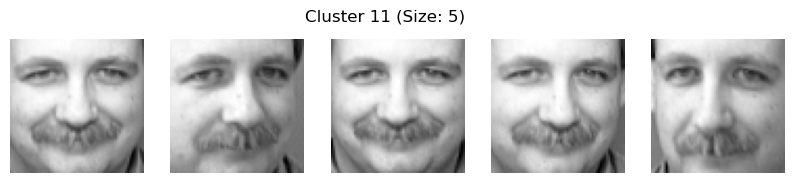

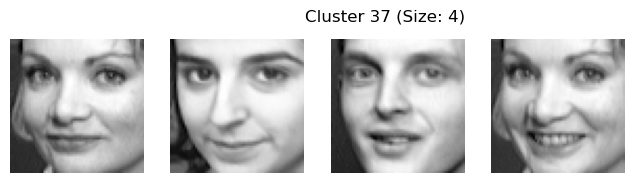

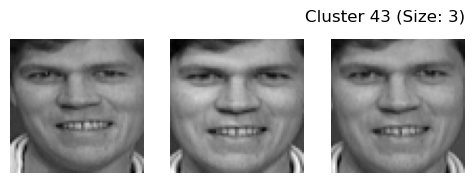

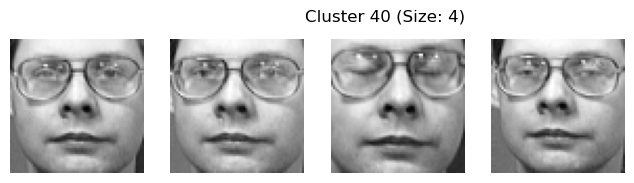

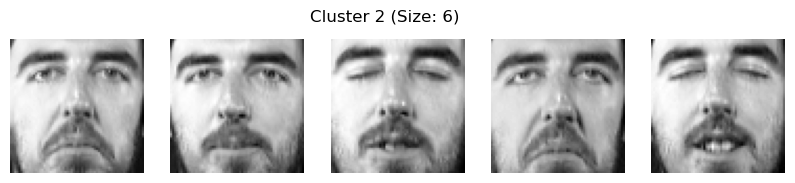

In [60]:
def visualize_clusters(cluster_id, images=train_images, labels=train_cluster_labels, n_samples=5):  
    cluster_mask = (labels == cluster_id)  # Filtering instances in the cluster
    cluster_images = images[cluster_mask]  # Subset images belonging to the cluster
    plt.figure(figsize=(n_samples * 2, 2))  
    for idx, img in enumerate(cluster_images[:n_samples]):  
       plt.subplot(1, n_samples, idx + 1)  
       plt.imshow(img, cmap="gray")  
       plt.axis("off")  
    plt.suptitle(f"Cluster {cluster_id} (Size: {len(cluster_images)})")  
    plt.show()  

# randomly select 5 unique cluster IDs from the total k clusters
for cluster_id in np.random.choice(k, size=5, replace=False):  
   visualize_clusters(cluster_id)

## Step 5. Visualize clusters

In [61]:
from sklearn.manifold import TSNE

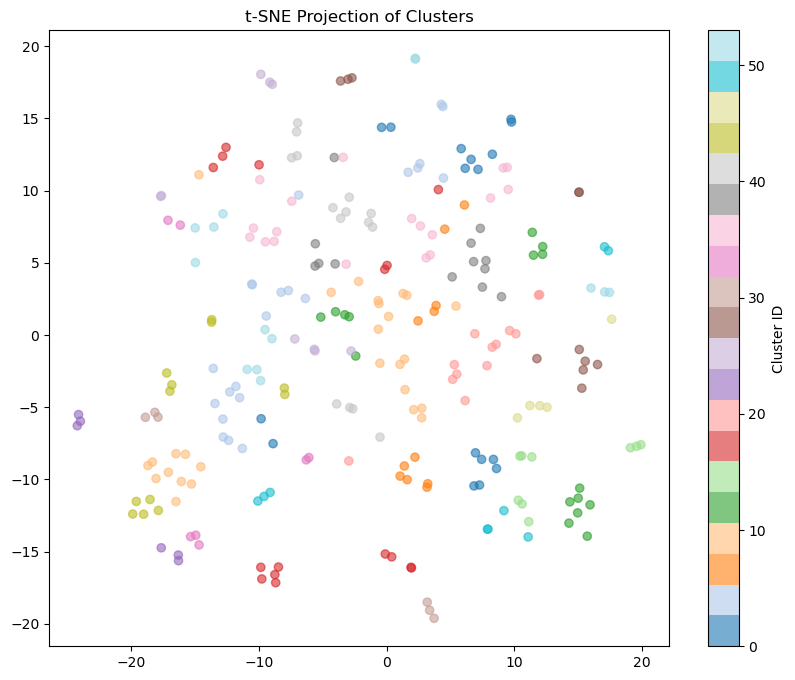

In [63]:
# Reduce training data to 2D with t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(10, 8))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:,1], c=train_cluster_labels, cmap="tab20", alpha=0.6)
plt.colorbar(label="Cluster ID")
plt.title("t-SNE Projection of Clusters")
plt.show()